<a href="https://colab.research.google.com/github/Ribeirotmr/Iniciacao-Cientifica/blob/main/PIIC_QC_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PIIC - Computação Quântica: Fundamentos 01

---

Referência:
*   https://learning.quantum.ibm.com/

---

Bit é um sistema físico com dois estados:
$$
| 0 \rangle\ ,\ | 1\rangle.
$$
Qubit é um sistema físico com dois graus de liberdade, cujos estados podem ser representadoa na base computacional:
$$
| 0 \rangle\ = \begin{bmatrix}
1 \\
0
\end{bmatrix} ,\
| 1\rangle = \begin{bmatrix}
0 \\
1
\end{bmatrix}.
$$
O estado geral de um qubit é uma superposição dos estados da base computacional:
$$
| \psi \rangle = \alpha | 0 \rangle + \beta | 1\rangle;\ \alpha, \beta \in \mathbb{C}, | \alpha |^2 + |\beta|^2 = 1.
$$
Para esse estado $| \psi \rangle$, sua media na base computacional resulta em $0$ com probabilidade $|\alpha|^2$ ou $1$ com probabilidade $|\beta|^2$. Após a medida, o estado do qubit será $| 0 \rangle$ ou $| 1 \rangle$, dependendo do resultado ter sido $0$ ou $1$:
$$
P_\psi(0)  = |\alpha|^2;\ P_\psi(1)  = |\beta|^2.
$$

⚡

As portas quânticas são operadores unitários no espaço do qubit, ou seja,

$$
U = \begin{bmatrix}
a & b\\
c & d
\end{bmatrix},\ U^* = U^{-1}.
$$

Portas básicas de 1 qubit:

$$
Z = \begin{bmatrix}
1 & 0\\
0 & -1
\end{bmatrix},\
X = NOT= \begin{bmatrix}
0 & 1\\
1 & 0
\end{bmatrix},\
Y = \begin{bmatrix}
0 & -i\\
i & 0
\end{bmatrix},\
H = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1\\
1 & -1
\end{bmatrix}.
$$


# QISKIT: Carregamento

In [ ]:
!pip install qiskit -U
!pip install qiskit_aer
!pip install qiskit-ibm-runtime
!pip install --upgrade qiskit

import qiskit
qiskit.__version__

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 9.7 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing ins

'1.2.1'

In [ ]:
!pip install matplotlib
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=a8f054f29c5120756c17dca148dc85f72c5fdc199116f009075ff9fc5c1ed7f3
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
# Qiskit: métodos básicos

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

from qiskit import transpile

from qiskit.visualization import plot_histogram, array_to_latex, plot_state_city

In [ ]:
# Acesso à IBM

from qiskit_ibm_runtime import QiskitRuntimeService

IBMToken_Thierry = "SUA CHAVE DE ACESSO"
QiskitRuntimeService.save_account(
channel = 'ibm_quantum',
token = IBMToken_Thierry,
overwrite=True
)

# Processadores disponíveis

service = QiskitRuntimeService()
print("Backends disponíveis:")
display(service.backends())

# Backend
service = QiskitRuntimeService(channel="ibm_quantum")

'''
Backend com menor número de jobs em execução
'''
backend = service.least_busy(operational=True, simulator=False)

'''
Backend personalizado
'''
#backend = service.backend(name="ibm_brisbane")

print("Backend:")
display(backend.name)

Backends disponíveis:


[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

Backend:


'ibm_sherbrooke'

# Exemplos

## Circuito com 1 qubit

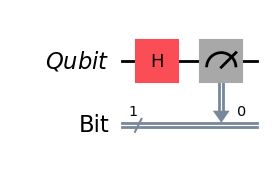

In [ ]:
'''
Circuto Quântico com 1 Qubit
'''

q = QuantumRegister(1, name='Qubit')
c = ClassicalRegister(1, name='Bit')
qc = QuantumCircuit(q,c)
qc.h(q[0])
qc.measure(q,c)
qc.draw('mpl')

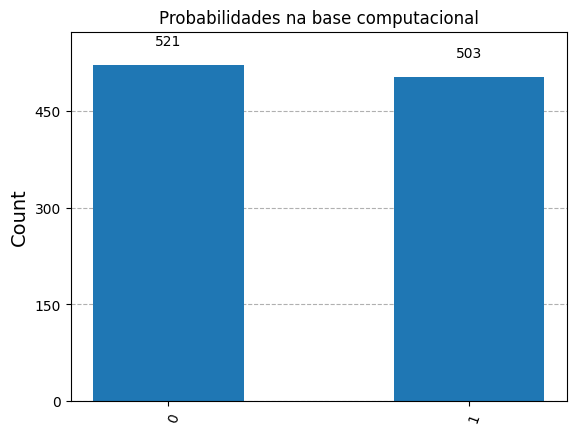

In [ ]:
'''
Simulação clássica do circuito
'''

from qiskit_aer import AerSimulator

# Simulador
simulator = AerSimulator()

# Transpilação
qc_t = transpile(qc, simulator)

# Simulação
result = simulator.run(qc_t, shots = 2**10).result()

# Plotagem do histograma das estatísticas
counts = result.get_counts(qc_t)
plot_histogram(counts, title='Probabilidades na base computacional')

## Circuito com 2 qubits

O espaço de dois qubits corresponde ao produto tensorial de dois espaços de 1 qubit:

$$
\mathcal{H}_2 = \mathcal{H}_1 \otimes \mathcal{H}_1, \ \ \mathcal{H}_1 = \mathbb{C}^2.
$$

Há portas em $\mathcal{H}_2$ que se decompõem como produto tensorial de portas de $\mathcal{H}_1$:

$$
U = U_0 \otimes U_1.
$$
Nesse caso:

$$
\begin{split}
| \psi \rangle &= | \psi_0 \rangle \otimes | \psi_1 \rangle \mapsto U | \psi \rangle = (U_0 | \psi_0 \rangle) \otimes (U_1 | \psi_1 \rangle).
\end{split}
$$

Notação para a ação das portas nas componentes de $\mathcal{H}_2$: indicamos o qubit em que a porta atua por um subescrito. Exemplo:

$$
\begin{split}
H_0 := H \otimes I : \text{denota a ação da porta Hadamard $H$ no qubit $q[0]$}.\\
H_1 := I \otimes H : \text{denota a ação da porta Hadamard $H$ no qubit $q[1]$}.
\end{split}
$$
Assim:
$$
\begin{split}
| \psi \rangle = |0 \rangle | 0 \rangle \mapsto H_0 | \psi \rangle &= (H| 0\rangle) | 0 \rangle \\
&= \left(\frac{|0 \rangle+ |1\rangle}{\sqrt{2}}\right) | 0 \rangle\\
&= \frac{1}{\sqrt{2}} | 0 \rangle |0\rangle +\frac{1}{\sqrt{2}} | 1 \rangle |0\rangle\\
&= \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|10\rangle.
\end{split}
$$

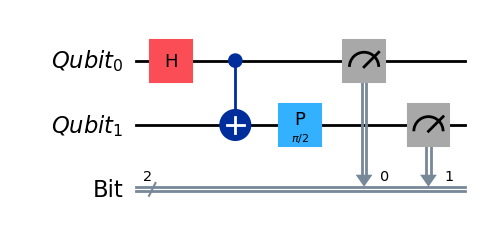

In [ ]:
'''
Circuto Quântico com 1 Qubit
'''

import numpy as np
from numpy import pi

q = QuantumRegister(2, name='Qubit')
c = ClassicalRegister(2, name='Bit')
qc = QuantumCircuit(q,c)
qc.h(q[0])
qc.cx(q[0],q[1])
qc.p(pi/2,q[1])
qc.measure([q[0],q[1]],[c[0],c[1]])
qc.draw('mpl')

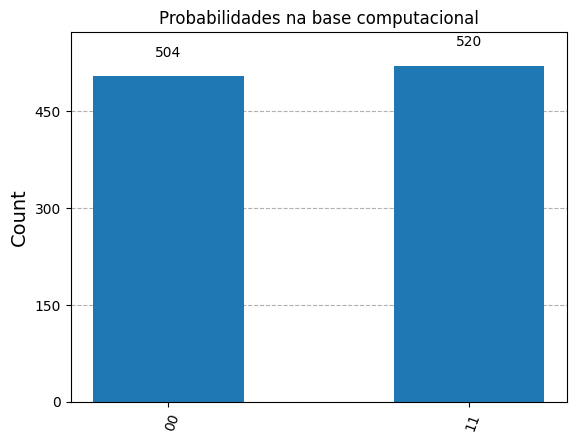

In [ ]:
'''
Simulação clássica do circuito
'''

# Simulador
simulator = AerSimulator()

# Transpilação
qc_t = transpile(qc, simulator)

# Simulação
result = simulator.run(qc_t, shots = 2**10).result()

# Plotagem do histograma das estatísticas
counts = result.get_counts(qc_t)
plot_histogram(counts, title='Probabilidades na base computacional')

In [ ]:
'''
Simulação Quântica
'''

# Backend

backend = service.backend(name="ibm_kyoto")
print(f"Backend: {backend}")

# Transpilação
from qiskit import transpile
qc_t = transpile(qc, backend=backend, optimization_level=1, basis_gates=backend.configuration().basis_gates)
display(qc_t.draw('mpl'))

# Simulação
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
sampler.options.dynamical_decoupling.enable = True
sampler.options.dynamical_decoupling.sequence_type = "XY4"

NameError: name 'service' is not defined

In [ ]:
# Ordem para execução da simulação no chip quântico da IBM

job = sampler.run(qc_t)
print(job.job_id())

cvc9rrk8w2g0008e8830


In [ ]:
job.status()

'DONE'

In [ ]:
job_id = "cvc9rrk8w2g0008e8830"
job = service.job(job_id)

job.result()#[0]

PrimitiveResult([PubResult(data=DataBin(Bit=BitArray(<shape=(), num_shots=4096, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'version': 2})

In [ ]:
# Extract counts from the quasi-distribution for the first circuit
count = job.result()[0].data.Bit.get_counts()  # Handle the case where 'counts' might be missing
count

{'00': 1784, '11': 1722, '01': 272, '10': 318}

Shots= 4096
Probabilidades:
P(00) = 0.435546875, P(10) = 0.07763671875, P(01) = 0.06640625 e P(11) = 0.42041015625
Histograma dos resultados:


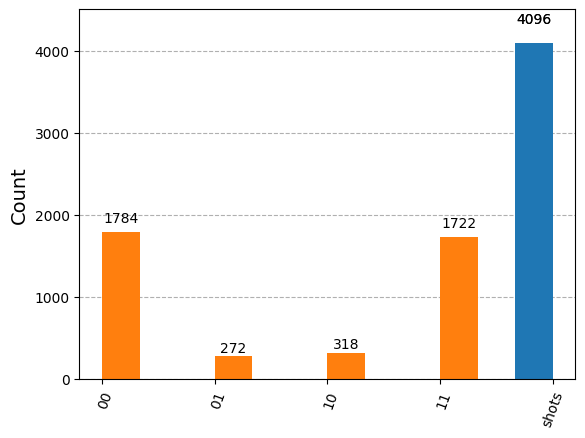

Histograma das probabilidades:


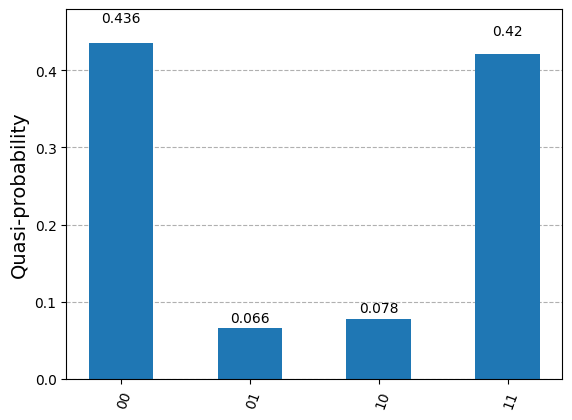

In [ ]:
# Plotagem das estatísticas
shots = count['00'] + count['11'] + count['01'] + count['10']
print(f"Shots= {shots}")
print("Probabilidades:")
print(f"P(00) = {count['00']/shots}, P(10) = {count['10']/shots}, P(01) = {count['01']/shots} e P(11) = {count['11']/shots}")

# Plotagem do  histograma dos resultados
from qiskit.visualization import plot_histogram
Shots = {'shots': shots}
print("Histograma dos resultados:")
display(plot_histogram([Shots, count]))
print("Histograma das probabilidades:")
probabilidade = {'00': count['00']/shots, '01': count['01']/shots, '10': count['10']/shots, '11': count['11']/shots}
plot_histogram(probabilidade)

# 2Qubit

In [ ]:
'''
Função 2Qubit
'''
def Dubit(n = 2):


# Interferômetro de Mach-Zehnder

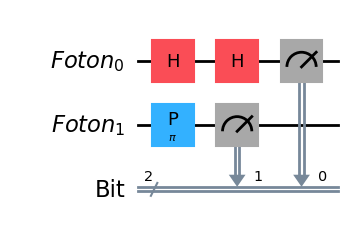

In [ ]:
'''
Interqerômetro de Mach-Zehnder
https://edisciplinas.usp.br/pluginfile.php/7654961/mod_resource/content/1/CFQ6a-02.pdf
'''

#lembrar depois da biblioteca

import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
# from qiskit import execute
from qiskit.visualization import plot_histogram
from numpy import pi

#Criação de registradores quanticos.
q = QuantumRegister(2, name='Foton')
c = ClassicalRegister(2, name='Bit')

qc = QuantumCircuit(q,c) #craição do circuito.

qc.h(q[0])  #aplicação da porta hadamard no primeiro qeixe para divir o qeixe, ou em termos quanticos um qoton.


#deixar pi/4 depois ir trocando para pi,pi/2,2pi,3pi/2 e etc, para ver como se comporta o qeixe
qc.p(pi, q[1])  #aplicação das portas de fase

qc.h(q[0]) #Aplicação da porta hadamar no segundo qoton apos ser dividido

qc.measure(q[0],c[0]) #medição do resultado
qc.measure(q[1], c[1])

qc.draw('mpl') #desenhar teste


# TESTES

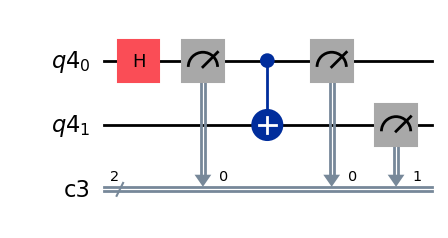

In [ ]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
teste = QuantumCircuit(q,c)
teste.h(q[0])
teste.measure(q[0],c[0])
teste.cx(q[0],q[1])
teste.measure([q[0],q[1]],[c[0],c[1]])
teste.draw('mpl')

Estadovetor:
Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))
Estadovetor em formato latex:


<IPython.core.display.Latex object>

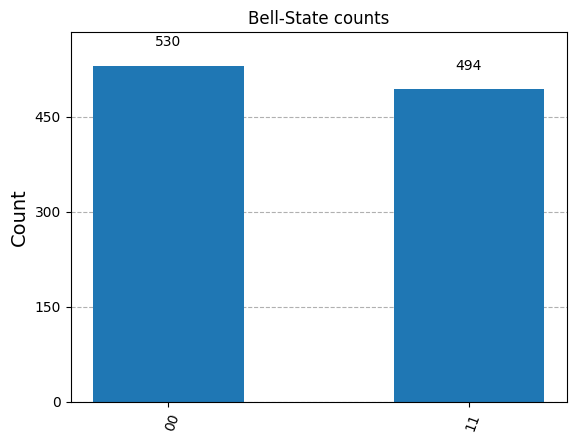

In [ ]:
# Simulador e transpilação
from qiskit_aer import AerSimulator
simulator = AerSimulator()

# Estado gerado pelo circuito
teste.save_statevector() # Armazenamento do estadovetor

# Simulador e transpilação
simulator = AerSimulator(method='statevector') # <-- ATENÇÃO ao método
teste_t = transpile(teste, simulator)

# Simulação e estadovetor
result = simulator.run(teste_t).result()
statevector = result.get_statevector(teste_t)
print("Estadovetor:")
print(statevector)

# Impressão do estado no formato Latex
from qiskit.visualization import array_to_latex
print("Estadovetor em formato latex:")
display(array_to_latex(statevector, precision=10, prefix='', source=False, max_size=8))

# Plotagem dos coeficientes do estado vetor
plot_state_city(statevector, title='Estado de Bell')

# Simulação e contagem
result = simulator.run(teste_t, shots = 2**10).result()

# Plotagem do histograma das estatísticas
counts = result.get_counts(teste_t)
plot_histogram(counts, title='Bell-State counts')